# Predykcja z użyciem ML

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

pd.options.display.max_columns = 50
pd.options.display.max_info_columns = 50
pd.options.display.max_rows = 100
data = pd.read_csv(r"data/cleared_data.csv")
data.drop("Unnamed: 0",inplace=True,axis=1)
data2 = pd.read_csv(r"data/data_after_eda.csv")
data2.drop("Unnamed: 0",inplace=True,axis=1)


# Regresja liniowa/ridge  wrong split


In [ ]:
features = data.columns.drop(['MVP','Player','Pos'])
X_train, X_test, y_train, y_test = train_test_split(data, data["MVP"], test_size=0.3, random_state=0)

reg = LinearRegression().fit(X_train[features],y_train)
PredTest = reg.predict(X_test[features])
score = reg.score(X_test[features], y_test)
mse = mean_squared_error(y_test,PredTest)
print(score)
print(mse)

comb = pd.concat([X_test[['Year','Player','MVP']],pd.DataFrame(PredTest,index=X_test.index,columns=["prediction"])],axis=1)
comb.sort_values("prediction",ascending=False).head(20)

comb[comb['Year'] == 2001].sort_values("prediction",ascending=False).head(20)

In [ ]:
from sklearn.linear_model import Ridge
reg = Ridge().fit(X_train[features],y_train)
PredTest = reg.predict(X_test[features])
print( reg.score(X_test[features], y_test) )
print(mean_squared_error(y_test,PredTest))

#reg.coef_

comb = pd.concat([X_test[['Year','Player','MVP']],pd.DataFrame(PredTest,index=X_test.index,columns=["prediction"])],axis=1)
comb.sort_values("prediction",ascending=False).head(20)


# Regresja Logistyczna / random forest , wrong split


In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter = 10000).fit(X_train[features],y_train)


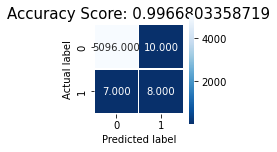

In [14]:
predictions = clf.predict(X_test[features])
score = clf.score(X_test[features], y_test) 
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

features = data.columns.drop(['MVP','Player','Pos'])
X_train, X_test, y_train, y_test = train_test_split(data, data["MVP"], test_size=0.5, random_state=15)

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train[features], y_train)
predictions = forest.predict(X_test[features])
score = forest.score(pd.DataFrame(X_test[features]), y_test)
mse = mean_squared_error(y_test,predictions)
print(score,mse)


0.99800796812749 0.00199203187250996


0.99800796812749 0.00199203187250996


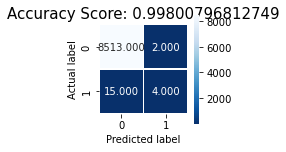

In [18]:
print(score,mse)

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()

# Dobre

## OLD

In [2]:

data_back = data.copy()
data_back['id'] = data_back.index

from sklearn.ensemble import RandomForestClassifier

years = range(2000, 2022)
mvp_years = dict()
results_mvp = pd.DataFrame(columns = ['id', 'Year', 'MVP'])

for y in years :
    train = data_back[data_back.Year < y]
    test = data_back[data_back.Year == y]
    X_train = train.drop(['id', 'Player','Pos','Year', 'MVP'], axis=1)
    y_train = train['MVP']
    X_test = test.drop(['id', 'Player','Pos','Year', 'MVP'], axis=1)
    
    # Random Forest

    random_forest = RandomForestClassifier(n_estimators=10)
    random_forest.fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    random_forest.score(X_train, y_train)
    acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
    
    pred_proba = random_forest.predict_proba(X_test)
    
    y_pred_proba = []
    for i in enumerate(pred_proba):
        y_pred_proba.append(i[1][1])
    y_pred_proba = np.asarray(y_pred_proba)
    
    mvp_years = pd.DataFrame({
        "id": test["id"],
        "Year": y,
        "MVP": y_pred_proba
        })
    
    results_mvp = pd.concat([results_mvp, mvp_years])

results_mvp['id'] = results_mvp['id'].astype('int')
career_player = data_back[['id', 'Player','MVP']]
results_mvp = results_mvp.merge(career_player, on='id')

results_mvp = results_mvp.drop_duplicates()
results_mvp = results_mvp.sort_values(by='MVP_x', ascending=False)

## New

In [ ]:
from tqdm import tqdm
data_back = data.copy()
data_back['id'] = data_back.index

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

years = range(2000, 2023)
predictions = pd.DataFrame()

for y in tqdm(years) :
    train = data_back[data_back.Year < y]
    test = data_back[data_back.Year == y]

    X_train = train.drop(['id', 'Player','Pos','Year', 'MVP','award_share','points_max','points_won','votes_first'], axis=1)
    y_train = train['MVP']
    X_test = test.drop(['id', 'Player','Pos','Year', 'MVP','award_share','points_max','points_won','votes_first'], axis=1)
    y_test = test['MVP']

    random_forest = RandomForestClassifier(n_estimators=50)
    random_forest.fit(X_train, y_train)
    pred_proba = pd.DataFrame(random_forest.predict_proba(X_test),columns=["No-MVP","MVP_pred_proba"])
    pred = random_forest.predict(X_test)
    #acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

    results = test.copy()
    results["MVP_pred_proba"] = pred_proba["MVP_pred_proba"].values
    results["MVP_pred"] = pred
    results = results.sort_values(by="MVP_pred_proba",ascending=False)
    results["Rank"] =results["MVP_pred_proba"].rank(ascending=False,method="min")
    predictions = predictions.append(results)
    
mse = mean_squared_error(predictions['MVP'],predictions['MVP_pred_proba'])
acc = accuracy_score(predictions['MVP'],predictions['MVP_pred'])
print("MSE:",mse)
print("ACC:",acc)

print(classification_report(predictions['MVP'],predictions['MVP_pred']))

cm = confusion_matrix(predictions['MVP'],predictions['MVP_pred'])
plt.figure(figsize=(2,2))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

rank_predictions = predictions.loc[predictions['MVP'] == 1,["Year","Player","MVP","MVP_pred_proba","Rank"]]

first_place = rank_predictions.loc[rank_predictions.Rank == 1.0,'Rank'].count() / len(years)
second_place = rank_predictions.loc[rank_predictions.Rank.isin([1.0,2.0]),'Rank'].count() / len(years)
third_place = rank_predictions.loc[rank_predictions.Rank.isin([1.0,2.0,3.0]),'Rank'].count() / len(years)

print(rank_predictions)

print("First place predictions: ",first_place,"%")
print("Second or best place predictions: ",second_place,"%")
print("Third or best place predictions: ",third_place,"%")



In [2]:
from tqdm import tqdm
data_back = data.copy()
data_back['id'] = data_back.index

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

years = range(2000, 2023)
predictions = pd.DataFrame()

for y in tqdm(years) :
    train = data_back[data_back.Year < y]
    test = data_back[data_back.Year == y]

    X_train = train.drop(['id', 'Player','Pos','Year', 'MVP','award_share','points_max','points_won','votes_first'], axis=1)
    y_train = train['MVP']
    X_test = test.drop(['id', 'Player','Pos','Year', 'MVP','award_share','points_max','points_won','votes_first'], axis=1)
    y_test = test['MVP']

    # Random Forest
    random_forest = RandomForestClassifier(n_estimators=50)
    random_forest.fit(X_train, y_train)
    score = random_forest.score(X_train, y_train)
    pred_proba = pd.DataFrame(random_forest.predict_proba(X_test),columns=["No-MVP","MVP_pred"])
    pred = random_forest.predict(X_test)
    acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

    results = test.copy()
    results["MVP_pred"] = pred_proba["MVP_pred"].values
    results = results.sort_values(by="MVP_pred",ascending=False).head(10)
    results = results[["Year","Player","MVP","MVP_pred"]]

    results["Rank"] =results["MVP_pred"].rank(ascending=False,method="min")

    result = results[results.MVP == 1]
    predictions = predictions.append(result)
    #top_5 = pd.DataFrame(pred_proba).sort_values(by=1, ascending=False).head(5)[1]


#cm = confusion_matrix(y_test,pred)
#plt.figure(figsize=(2,2))
#sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
predictions

100%|██████████| 23/23 [00:17<00:00,  1.34it/s]


,Year,Player,MVP,MVP_pred,Rank
6985,2000,Shaquille O'Neal,1.0,0.28,1.0
7316,2001,Allen Iverson,1.0,0.06,4.0
7692,2002,Tim Duncan,1.0,0.34,1.0
8120,2003,Tim Duncan,1.0,0.34,3.0
8582,2004,Kevin Garnett,1.0,0.50,1.0
9640,2006,Steve Nash,1.0,0.04,9.0
10104,2007,Dirk Nowitzki,1.0,0.16,3.0
10326,2008,Kobe Bryant,1.0,0.02,9.0
10918,2009,LeBron James,1.0,0.46,1.0
11375,2010,LeBron James,1.0,0.44,1.0


In [4]:
feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(10)

,importance
WS,0.096376
VORP,0.086417
WS/48,0.054034
OWS,0.049933
PTS,0.033550
PER,0.033532
BPM,0.033252
FGA,0.030722
AST,0.027846
DWS,0.026955


In [3]:
data_back = data2.copy()
data_back['id'] = data_back.index

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

years = range(2000, 2023)
predictions = pd.DataFrame()

for y in years :
    train = data_back[data_back.Year < y]
    test = data_back[(data_back.Year == y) &(data_back.is_smote == False) ]

    X_train = train.drop(['id', 'Player','Pos','Year', 'MVP','award_share','points_max','points_won','votes_first','is_smote'], axis=1)
    y_train = train['award_share']
    X_test = test.drop(['id', 'Player','Pos','Year', 'MVP','award_share','points_max','points_won','votes_first','is_smote'], axis=1)
    y_test = test['award_share']

    # Random Forest
    random_forest = RandomForestRegressor(n_estimators=50)
    random_forest.fit(X_train, y_train)
    score = random_forest.score(X_train, y_train)
    pred = pd.DataFrame(random_forest.predict(X_test),columns=["MVP_pred"])
    acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

    results = test.copy()
    #results["MVP_pred"] = pred["MVP_pred"].values
    results["MVP_pred"] = pred.values
    results = results.sort_values(by="MVP_pred",ascending=False).head(10)
    results = results[["Year","Player","MVP","MVP_pred"]]

    results["Rank"] =results["MVP_pred"].rank(ascending=False,method="min")

    result = results[results.MVP == 1]
    predictions = predictions.append(result)
    #top_5 = pd.DataFrame(pred_proba).sort_values(by=1, ascending=False).head(5)[1]


#cm = confusion_matrix(y_test,pred)
#plt.figure(figsize=(2,2))
#sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
predictions

,Year,Player,MVP,MVP_pred,Rank
2066,2000,Shaquille O'Neal,1.0,0.695979,1.0
2149,2001,Allen Iverson,1.0,0.571524,1.0
2248,2002,Tim Duncan,1.0,0.755316,1.0
2368,2003,Tim Duncan,1.0,0.797326,1.0
2500,2004,Kevin Garnett,1.0,0.966530,1.0
2797,2006,Steve Nash,1.0,0.193069,9.0
2926,2007,Dirk Nowitzki,1.0,0.835299,1.0
2981,2008,Kobe Bryant,1.0,0.218962,5.0
3154,2009,LeBron James,1.0,0.674001,1.0
3286,2010,LeBron James,1.0,0.842326,1.0


In [ ]:
feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.head(10)

In [ ]:
from pandas.core.dtypes.common import validate_all_hashable

# Shuffling the data
modelDf = labeledDataDf.sample(frac=1).reset_index(drop = True)

# Train Data
trainInfo = modelDf[["season", "player", "pos", "team_id","award_share",  "was_mvp", "is_smote"]]
trainData = modelDf[columns]
trainTargets = modelDf[["award_share"]]

# Test Data
testInfo = dfTestSet[["season", "player", "pos", "team_id", "award_share", "was_mvp"]]
testData = dfTestSet[columns]
testTargets = dfTestSet[["award_share"]]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

validation_scores = {"season" : [], "mae" : [], "was_mvp" : [], "was_top_two" : [], "was_top_three":[], "info" : []}
seasons = trainInfo.season.unique()
for season in seasons:
  print("\n")
  print(f"Season: {season}")

  trainFold = trainData[trainInfo["season"] != season]
  trainTarFold = trainTargets[trainInfo["season"] != season]
  valFold = trainData[(trainInfo["season"] == season) & (~trainInfo["is_smote"])]
  valTarFold = trainTargets[(trainInfo["season"] == season) & (~trainInfo["is_smote"])]
  valInfo = trainInfo[(trainInfo["season"] == season) & (~trainInfo["is_smote"])]

  regr = RandomForestRegressor(max_depth = 7, random_state=0)
  regr.fit(trainFold.to_numpy(), trainTarFold.to_numpy()[:,0])

  valPred = regr.predict(valFold)
  mae = np.mean(np.absolute(valPred - valTarFold.to_numpy()[:,0]))

  print(f"MAE: {mae}")

  topTwo = valInfo.iloc[np.argsort(valPred)[-2:]]
  was_top_two = sum(topTwo["was_mvp"]) > 0
  topThree = valInfo.iloc[np.argsort(valPred)[-3:]]
  was_top_three = sum(topThree["was_mvp"]) > 0
  print("Predicted top three players in MVP voting with their actual award_share:")
  print(topThree.iloc[::-1])


  mostVotes = np.argmax(valPred)
  score = np.amax(valPred)
  was_mvp = valInfo.iloc[[mostVotes]]["was_mvp"].values[0]
  player = valInfo.iloc[[mostVotes]]["player"].values[0]
  print(f"Predicted MVP: {player}")
  print(f"Predicted Win Share: {score}")
  print(f"Was MVP correct: {was_mvp}")
  
  validation_scores["season"].append(season)
  validation_scores["mae"].append(mae)
  validation_scores["was_mvp"].append(was_mvp)
  validation_scores["was_top_two"].append(was_top_three)
  validation_scores["was_top_three"].append(was_top_three)
  validation_scores["info"].append(valInfo.iloc[[mostVotes]])

In [ ]:
from tqdm import tqdm
data_back = data.copy()
data_back['id'] = data_back.index

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

years = range(2000, 2023)
predictions = pd.DataFrame()

for y in tqdm(years) :
    train = data_back[data_back.Year < y]
    test = data_back[data_back.Year == y]

    X_train = train.drop(['id', 'Player','Pos','Year', 'MVP','award_share','points_max','points_won','votes_first'], axis=1)
    y_train = train['MVP']
    X_test = test.drop(['id', 'Player','Pos','Year', 'MVP','award_share','points_max','points_won','votes_first'], axis=1)
    y_test = test['MVP']

    # Random Forest
    random_forest = RandomForestClassifier(n_estimators=50)
    random_forest.fit(X_train, y_train)
    #score = random_forest.score(X_train, y_train)
    pred_proba = pd.DataFrame(random_forest.predict_proba(X_test),columns=["No-MVP","MVP_pred"])
    pred = random_forest.predict(X_test)
    #acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

    
    
    results = test.copy()
    results["MVP_pred"] = pred_proba["MVP_pred"].values
    results = results.sort_values(by="MVP_pred",ascending=False).head(10)
    results = results[["Year","Player","MVP","MVP_pred"]]

    results["Rank"] =results["MVP_pred"].rank(ascending=False,method="min")

    result = results[results.MVP == 1]
    predictions = predictions.append(result)
    #top_5 = pd.DataFrame(pred_proba).sort_values(by=1, ascending=False).head(5)[1]


#cm = confusion_matrix(y_test,pred)
#plt.figure(figsize=(2,2))
#sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
predictions